# Art generator, in the style of [Sophie Taeuber-Arp](https://en.wikipedia.org/wiki/Sophie_Taeuber-Arp)
![original from https://www.pinterest.com/pin/57280226486268470/](tarp/original.jpg)

In [2]:
from PIL import Image, ImageFont, ImageDraw, ImageChops
from scipy.interpolate import UnivariateSpline
import numpy as np
import random

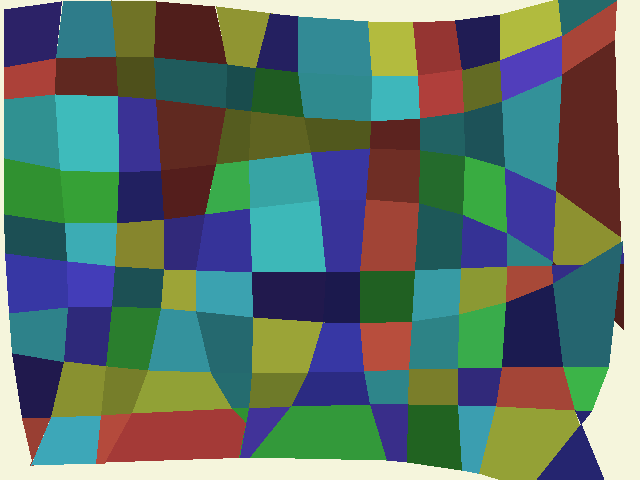

In [1]:
size = 1000
image = Image.new("RGB", (640,480), "beige")
drawing = ImageDraw.Draw(image)

splinepoints = 4
squaresize = 50 
xsquares = int(image.width/squaresize)
ysquares = int(image.height/squaresize)
x = np.arange(0, image.width, image.width/splinepoints)
ysplines = []
for i in range(0,ysquares+1):
    y = np.random.uniform(i*squaresize,(i+0.5)*squaresize,(splinepoints))
    ysplines.append(UnivariateSpline(x, y, s=0))
y = np.arange(0, image.height, image.height/splinepoints)
xsplines = []
for i in range(0,xsquares+1):
    x = np.random.uniform(i*squaresize,(i+0.5)*squaresize,(splinepoints))
    xsplines.append(UnivariateSpline(y, x, s=0))

x = np.arange(0, image.width-squaresize, squaresize)    
y = np.arange(0, image.height-squaresize, squaresize)
for j in range(0,ysquares):
    t = ysplines[j](x)
    b = ysplines[j+1](x)
    h = np.random.randint(0, 5, (xsquares))*60 + np.random.randint(0, 10, (xsquares))
    l = np.random.randint(20, 50, (xsquares))
    for i in range(0, xsquares):
        drawing.polygon(
            [
                xsplines[i](t[i]), ysplines[j](xsplines[i](t[i])), 
                xsplines[i](b[i]), ysplines[j+1](xsplines[i](b[i])),
                xsplines[i+1](b[i]), ysplines[j+1](xsplines[i+1](b[i])),
                xsplines[i+1](t[i]), ysplines[j](xsplines[i+1](t[i]))
            ]
            , fill="hsl("+str(h[i])+",50%,"+str(l[i])+"%)"
        )
    
image.save(r"tarp/tarp"+str(random.randint(0,1000))+".png")
image
#help(np.arange)